In [1]:
import numpy as np
import json
import pandas as pd
from k_means_constrained import KMeansConstrained
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the JSON file
with open("C:/Users/ADMIN/Downloads/model_build_inputs/model_build_inputs/route_data.json") as f:
    route = json.load(f)

# count the number of keys
num_routes = len(route.keys())

print(f"The JSON file has {num_routes} routes.")

The JSON file has 6112 routes.


In [3]:
routedf=pd.DataFrame(route)
routedf=routedf.T

In [4]:
routedf.head()

,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,route_score,stops
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,DLA3,2018-07-27,16:02:10,3313071.0,High,"{'AD': {'lat': 34.099611, 'lng': -118.283062, ..."
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59,DSE4,2018-07-28,15:44:41,4247527.0,High,"{'AC': {'lat': 47.689446, 'lng': -122.296071, ..."
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f,DSE5,2018-08-18,15:32:04,4247527.0,High,"{'AA': {'lat': 47.268001, 'lng': -122.5079, 't..."
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f,DLA9,2018-08-15,15:09:38,3313071.0,High,"{'AB': {'lat': 33.823076, 'lng': -118.058727, ..."
RouteID_0021a2aa-780f-460d-b09a-f301709e2523,DLA7,2018-08-05,14:23:26,3313071.0,High,"{'AA': {'lat': 33.84364, 'lng': -117.773651, '..."


In [5]:
# load the JSON file
with open("C:/Users/ADMIN/Downloads/model_build_inputs/model_build_inputs/travel_times.json") as f:
    travel= json.load(f)

# count the number of keys
num_travels = len(travel.keys())

print(f"The JSON file has {num_travels} .")



The JSON file has 6112 .


In [6]:
traveldf=pd.DataFrame(travel)
traveldf=traveldf.T

In [7]:
traveldf.head()

,AD,AF,AG,BA,BE,BG,BP,BT,BY,BZ,...,GG,PH,EN,QN,SG,SX,SU,UK,VK,BN
RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,"{'AD': 0.0, 'AF': 198.3, 'AG': 264.9, 'BA': 26...","{'AD': 209.8, 'AF': 0.0, 'AG': 348.3, 'BA': 22...","{'AD': 295.7, 'AF': 333.6, 'AG': 0.0, 'BA': 27...","{'AD': 284.0, 'AF': 219.5, 'AG': 288.2, 'BA': ...","{'AD': 107.9, 'AF': 178.9, 'AG': 308.2, 'BA': ...","{'AD': 136.3, 'AF': 90.6, 'AG': 264.2, 'BA': 2...","{'AD': 120.0, 'AF': 267.6, 'AG': 163.7, 'BA': ...","{'AD': 172.7, 'AF': 64.8, 'AG': 317.3, 'BA': 2...","{'AD': 251.3, 'AF': 341.9, 'AG': 82.8, 'BA': 2...","{'AD': 58.8, 'AF': 240.8, 'AG': 279.1, 'BA': 2...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59,NaN,NaN,"{'AC': 426.5, 'AE': 295.1, 'AG': 0.0, 'AN': 12...","{'AC': 321.3, 'AE': 140.3, 'AG': 330.5, 'AN': ...",NaN,NaN,"{'AC': 216.7, 'AE': 49.6, 'AG': 377.2, 'AN': 3...",NaN,"{'AC': 80.1, 'AE': 102.1, 'AG': 311.7, 'AN': 3...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RouteID_001948e9-4675-486d-9ec5-912fd8e0770f,"{'AA': 244.7, 'AD': 0.0, 'AJ': 434.0, 'AP': 17...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f,NaN,NaN,"{'AB': 290.8, 'AC': 69.8, 'AG': 0.0, 'AI': 310...",NaN,"{'AB': 230.4, 'AC': 265.4, 'AG': 319.1, 'AI': ...",NaN,NaN,NaN,"{'AB': 227.7, 'AC': 359.7, 'AG': 364.3, 'AI': ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RouteID_0021a2aa-780f-460d-b09a-f301709e2523,NaN,"{'AA': 427.0, 'AB': 529.9, 'AF': 0.0, 'AG': 37...","{'AA': 241.8, 'AB': 334.3, 'AF': 359.1, 'AG': ...",NaN,NaN,"{'AA': 588.2, 'AB': 473.8, 'AF': 264.2, 'AG': ...","{'AA': 529.7, 'AB': 609.7, 'AF': 329.1, 'AG': ...",NaN,NaN,"{'AA': 429.6, 'AB': 515.2, 'AF': 442.5, 'AG': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
number=np.random.randint(low=0,high=traveldf.shape[0])
route_distances=pd.DataFrame(traveldf.iloc[number].to_dict()).dropna(axis=1)
route_stops_data=pd.DataFrame.from_dict(routedf[ 'stops'][number], orient='columns').T

In [9]:
route_stops_data

,lat,lng,type,zone_id
AG,42.355263,-71.195224,Dropoff,A-28.3E
AH,42.339112,-71.176116,Dropoff,A-29.2A
AJ,42.356082,-71.195996,Dropoff,A-28.3E
AL,42.336424,-71.180221,Dropoff,A-29.1A
AV,42.346889,-71.181879,Dropoff,A-28.3B
...,...,...,...,...
ZF,42.347778,-71.189121,Dropoff,A-28.2C
ZJ,42.349553,-71.193457,Dropoff,A-28.1D
ZP,42.353214,-71.191498,Dropoff,A-28.2G
ZU,42.359425,-71.191292,Dropoff,A-28.3J


In [10]:
route_distances

,AG,EX,FF,GB,GS,GU,HR,HT,JH,KM,...,MY,FN,PM,UB,UP,NG,RV,CD,MS,VB
AG,0.0,419.6,248.4,365.9,153.9,255.8,483.6,136.9,107.9,106.2,...,425.1,198.9,149.0,479.8,165.8,125.0,124.5,472.4,207.0,278.0
AH,567.4,330.9,365.3,358.8,473.2,474.3,102.9,623.9,511.7,547.4,...,336.4,430.0,611.2,139.3,449.5,612.0,448.2,295.5,524.1,341.7
AJ,56.7,476.4,305.2,471.6,210.7,361.5,540.4,160.9,208.8,163.0,...,481.9,299.8,184.5,536.6,217.8,177.0,176.5,529.2,312.7,330.0
AL,558.7,322.2,356.6,350.1,464.5,465.6,90.0,615.2,498.8,538.7,...,327.7,417.1,602.5,130.6,436.6,603.3,435.3,292.4,515.4,328.8
AV,329.7,75.2,127.6,89.1,235.5,204.6,170.2,386.2,274.0,309.7,...,80.7,192.3,373.5,166.4,211.8,374.3,210.5,179.6,254.4,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZF,257.3,211.7,112.5,125.7,163.1,139.6,306.7,333.2,168.4,235.3,...,217.2,104.8,275.5,302.9,124.3,301.9,138.1,238.8,187.9,142.1
ZJ,194.5,304.4,208.7,218.4,259.3,80.5,399.4,306.3,146.3,275.6,...,309.9,178.7,318.4,395.6,220.5,294.4,234.3,344.6,70.0,280.0
ZP,223.7,332.9,125.6,246.9,160.4,164.1,427.9,330.5,123.6,232.6,...,338.4,73.6,272.8,424.1,121.6,299.2,135.4,373.1,153.6,155.2
ZU,151.6,481.9,310.4,444.3,216.2,378.2,545.9,83.9,230.3,109.3,...,487.4,321.3,62.6,542.1,228.1,103.5,186.8,534.7,329.4,340.0


In [11]:

routedf.loc[traveldf.index[number]]

station_code                                                          DBO2
date_YYYY_MM_DD                                                 2018-08-17
departure_time_utc                                                14:10:46
executor_capacity_cm3                                            3313071.0
route_score                                                         Medium
stops                    {'AG': {'lat': 42.355263, 'lng': -71.195224, '...
Name: RouteID_30525a61-6d54-411c-8719-091fb02378d6, dtype: object

In [12]:
X=np.array(route_distances).transpose()
n_samples=len(X)
n_clusters=int(len(route_stops_data["zone_id"].value_counts()))
#n_clusters=2
clf = KMeansConstrained(
     n_clusters=n_clusters,
     size_min=int((n_samples/n_clusters))-1,
     size_max=int((n_samples/n_clusters))+1,
     random_state=0
)
clf.fit_predict(X)
print(clf.cluster_centers_)
print(clf.labels_)

[[ 472.1         237.          528.1        ...  379.63333333
   533.61666667  109.43333333]
 [ 196.35        501.41666667  302.05       ...   61.28333333
   318.75        298.33333333]
 [ 944.625       497.425      1001.425      ...  889.7
  1000.85        680.625     ]
 ...
 [ 366.53333333  307.81666667  431.48333333 ...  270.4
   431.51666667  130.45      ]
 [ 185.75        534.58333333  289.85       ...  128.33333333
   308.15        314.58333333]
 [ 303.1         414.76        407.84       ...  208.32
   395.3         208.04      ]]
[19 10 13 21  7  8 14  3  6 16  3  9 12 21 16  7  6 17  5 10  8  0  5 10
  4  4  1 17 21  4 22 16  3  9  1 14 22 18  7 12 23 19 17  4  9  1  0 11
 13 20 18 14  2  6 21 20  0 18 21 17  6 19 14  3  8  6  0 23 12 23 15  5
 22  8 17 12 15 19 22 17 15 18  1  4 16 12 20 23 18  4  6  5  9 16 13  8
  1  0  8 23  2 15 10  1 11 19  7 14 18 11  2 15 13 22 15 21 11 20  9  3
 11 13 12 20 10 22  2 10 11 16 14  7  3  7  0 20 13]


In [13]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=n_clusters).fit(route_distances)

<AxesSubplot:xlabel='lat', ylabel='lng'>

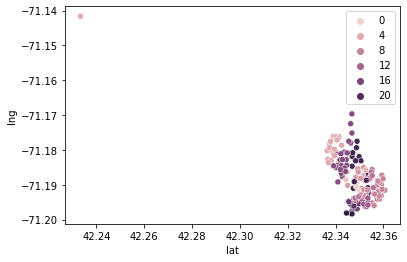

In [14]:
sns.scatterplot(data=route_stops_data,x=route_stops_data["lat"], y=route_stops_data["lng"], hue=kmedoids.labels_)

In [15]:
route_stops_data["Cluster"]=clf.labels_
route_stops_data.head()

,lat,lng,type,zone_id,Cluster
AG,42.355263,-71.195224,Dropoff,A-28.3E,19
AH,42.339112,-71.176116,Dropoff,A-29.2A,10
AJ,42.356082,-71.195996,Dropoff,A-28.3E,13
AL,42.336424,-71.180221,Dropoff,A-29.1A,21
AV,42.346889,-71.181879,Dropoff,A-28.3B,7


In [16]:
route_stops_data["lat"]=route_stops_data["lat"].astype('float')
route_stops_data["lng"]=route_stops_data["lng"].astype('float')
route_stops_data["Cluster"]=route_stops_data["Cluster"].astype('category')

In [17]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#lng_scaled=scaler.fit_transform(route_stops_data["lng"].to_numpy().reshape(-1,1))
#route_stops_data["lng"]=lng_scaled
#lat_scaled=scaler.fit_transform(route_stops_data["lat"].to_numpy().reshape(-1,1))
#route_stops_data["lat"]=lat_scaled

<AxesSubplot:xlabel='lat', ylabel='lng'>

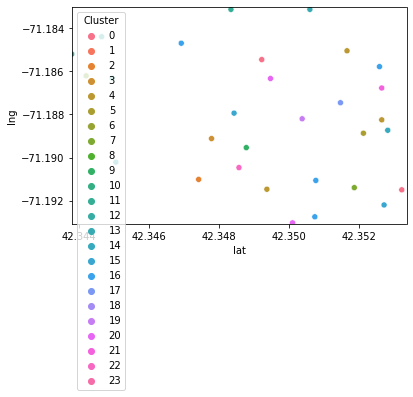

In [18]:
fig, ax = plt.subplots()
ax.set_xlim(route_stops_data.describe().loc["25%"]["lat"],route_stops_data.describe().loc["75%"]["lat"])
ax.set_ylim(route_stops_data.describe().loc["25%"]["lng"],route_stops_data.describe().loc["75%"]["lng"])
sns.scatterplot(data=route_stops_data,x=route_stops_data["lat"], y=route_stops_data["lng"], hue=route_stops_data["Cluster"])



In [19]:
def get_cluster_points(num_cluster):
    return route_stops_data[route_stops_data["Cluster"]==num_cluster]

def get_distances_cluster(num_cluster):
    cluster_points_data=get_cluster_points(num_cluster)
    cols=cluster_points_data.index.to_list()
    route_cluster_distances=route_distances[cols]
    route_cluster_distances=route_cluster_distances.loc[cluster_points_data.index]
    distances_list_cluster=[]
    for i in range (route_cluster_distances.shape[0]):
        for j in range (route_cluster_distances.shape[1]):
            if i!=j:
                row=route_cluster_distances.index[i]
                column=route_cluster_distances.columns[j]
                value=route_cluster_distances.loc[row][column]
                distances_list_cluster.append((row,column,value))
    return distances_list_cluster


In [20]:
# load the JSON file
with open("C:/Users/ADMIN/Downloads/model_build_inputs/model_build_inputs/package_data.json") as f:
    package = json.load(f)

# count the number of keys
num_packages = len(route.keys())

print(f"The JSON file has {num_packages} packages.")

The JSON file has 6112 packages.


In [21]:
packages_df=pd.DataFrame(package)
packages_df.head()

,RouteID_00143bdd-0a6b-49ec-bb35-36593d303e77,RouteID_0016bc70-cb8d-48b0-aa55-8ee50bdcdb59,RouteID_001948e9-4675-486d-9ec5-912fd8e0770f,RouteID_001b4ee3-c4f2-467f-932b-c85524d1021f,RouteID_0021a2aa-780f-460d-b09a-f301709e2523,RouteID_0036cf37-1c93-48f8-b337-3dd6d1a195d8,RouteID_00437423-5a8f-4fac-8efa-85264f0a3944,RouteID_00573a3d-b909-42ee-8a99-c6474309d96b,RouteID_00575a14-7d19-4291-8853-8f7095ed1bc6,RouteID_00575ca4-8a63-49d2-96c8-9b347be5ba6c,...,RouteID_ff709338-da35-4864-ab32-6bcd8b75f953,RouteID_ff915688-4784-49a0-9ee6-f424f1768ca4,RouteID_ffbcdf1c-5631-488a-9b30-0e704fde8a3e,RouteID_ffc2b0c3-917a-4041-8fdd-399ffbd0752f,RouteID_ffc52bc8-6160-40f5-a3b7-cf6350dfac78,RouteID_ffd16e94-e3db-435f-a128-1ddcb2a34e54,RouteID_ffe98097-93df-44b0-9c45-4fedbafae3f3,RouteID_ffebb6fc-ce81-46db-b2a1-2750c0333185,RouteID_fff2548c-1069-4340-8e50-08420efe435d,RouteID_fffd257c-3041-4736-be7a-5efea8af1173
AD,{'PackageID_9d7fdd03-f2cf-4c6f-9128-028258fc09...,NaN,{'PackageID_de2b05b8-2186-47b2-b0f1-640cd01b65...,NaN,NaN,NaN,NaN,NaN,{'PackageID_2567ffe2-6172-4730-951f-4eeb477dc7...,NaN,...,{'PackageID_6da1aa31-1d40-453e-af28-28c3f895f5...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AF,{'PackageID_15c6a204-ec5f-4ced-9c3d-472316cc77...,NaN,NaN,NaN,{'PackageID_ef2e9ad8-43a7-4043-9144-faf6730da3...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,{'PackageID_77336e1e-0060-48ea-9576-502672f6ac...,{'PackageID_37d054d6-3420-49a7-b336-82d76d4040...,NaN,NaN
AG,{'PackageID_3b28f781-242e-416e-9575-84c7188b82...,{'PackageID_62bd35ae-6fe9-40c0-8c58-0d1021a796...,NaN,{'PackageID_1520728c-7a38-45a1-9e5d-123eb6d023...,{'PackageID_9f9e7677-9f0f-42c4-ac05-8015c1447d...,NaN,NaN,{'PackageID_66dffd90-5ed1-467a-bb08-29a6a75b13...,{'PackageID_516e130d-177c-4323-a25e-d00b61b3ce...,{'PackageID_f0f34a05-5434-4a6a-ba53-fa7b814e15...,...,{'PackageID_695dd622-6a8c-4e88-b26d-8254d0617e...,{'PackageID_7d68e440-b27b-4b75-9f67-0b01dad51b...,NaN,NaN,NaN,{'PackageID_156384dc-0716-43b2-99d5-d07e646c94...,NaN,NaN,NaN,{'PackageID_c6d0e7e4-0be0-43b6-a8c9-ae62f0c288...
BA,{'PackageID_a18e36e0-6b5a-45b7-bf7a-7c3a15bd5a...,{'PackageID_80d944eb-442a-422f-9d40-3ad4bb73d7...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,{'PackageID_8d087e79-11d3-4b84-920d-8016029333...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BE,{'PackageID_22c8f630-8ab9-40d5-a36d-38ef01761b...,NaN,NaN,{'PackageID_d3c08539-cea1-4079-a0a2-f064fc2083...,NaN,{'PackageID_076224e5-3e6f-4b0a-b927-b74c185412...,NaN,{'PackageID_d7f87b82-1d83-413e-a3d6-4dc2f6ede7...,NaN,NaN,...,NaN,{'PackageID_449d90ad-622e-4a4f-bca8-631500937b...,NaN,NaN,NaN,NaN,{'PackageID_40330055-82e3-4b22-8ab7-baa95d8a21...,NaN,NaN,NaN


In [22]:
route=packages_df.columns[number]
packages_route=packages_df[[route]]
packages_route=packages_route.loc[route_stops_data.index]
packages_route.head()

,RouteID_30525a61-6d54-411c-8719-091fb02378d6
AG,{'PackageID_fa7fe488-fd2c-457a-bf7c-1fa154a763...
AH,{'PackageID_a6f9f8f0-b50c-4dc4-8f1c-b148b86c85...
AJ,{'PackageID_84391326-5c99-4b34-9bc6-0ab8968533...
AL,{'PackageID_da4833b7-b182-4e3b-8edd-fb864ccf04...
AV,{'PackageID_f15c5ea7-4e7a-48d3-80ac-9a680d34be...


In [23]:
def isNaN(string):
    return string != string

def remove_nan(L):
    if L==[]:
        L=[np.nan]
    new_list=[]
    for e in L:
        if isNaN(e)==False:
            new_list.append(e)
    if new_list==[]:
        new_list=[L[0]]
    return new_list

In [24]:
from datetime import datetime

origin_time=datetime.strptime(routedf.iloc[number]["date_YYYY_MM_DD"]+" "+"00:00:00",'%Y-%m-%d %H:%M:%S')
cluster_1=get_cluster_points(num_cluster=0)
stop_stations=list(cluster_1.index)



def get_starts_ends():
    start=[]
    end=[]
    starts=[]
    ends=[]
    for i in range (len(packages_route)):
        stop=packages_route.index[i]
        if pd.isna(packages_route.loc[stop][0]):
            continue
        keys=packages_route.loc[stop][0].keys()
        keys=list(keys)
        for k in keys:
            start.append(packages_route.loc[stop][0].get(k).get('time_window').get('start_time_utc'))
            end.append(packages_route.loc[stop][0].get(k).get('time_window').get('end_time_utc'))
        start_cleaned=remove_nan(start)
        end_cleaned=remove_nan(end)
        start_package=min(start_cleaned)
        end_package=max(end_cleaned)
        starts.append((stop,start_package))
        ends.append((stop,end_package))
        start=[]
        end=[]
    return (dict(starts),dict(ends))

starts,ends=get_starts_ends()


def get_starts_ends_without_nans(starts,ends):

    non_null=[]
    
    for element in starts:
        if isNaN(starts[element])==False:
            non_null.append(starts[element])
    min_time=min(non_null)
    non_null=[]
    for element in ends:
        if isNaN(ends[element])==False:
            non_null.append(ends[element])
    max_time=max(non_null)   
    for element in starts:
        if isNaN(starts[element]):
            starts[element]=min_time
    for element in ends:
        if isNaN(ends[element]):
            ends[element]=max_time
    return (starts,ends)

starts, ends=get_starts_ends_without_nans(starts,ends)
def get_ab_per_cluster(stop_stations,starts,ends):
    starts_per_cluster=[]
    ends_per_cluster=[]
    for stop in stop_stations:
        date_difference=datetime.strptime(starts[stop], '%Y-%m-%d %H:%M:%S')-origin_time
        days=date_difference.days
        seconds=date_difference.seconds
        total_time=days*24+(seconds/3600)
        starts_per_cluster.append(total_time)
        date_difference=datetime.strptime(ends[stop], '%Y-%m-%d %H:%M:%S')-origin_time
        days=date_difference.days
        seconds=date_difference.seconds
        total_time=days*24+(seconds/3600)
        ends_per_cluster.append(total_time)
    return (starts_per_cluster,ends_per_cluster)



In [25]:
 get_distances_cluster(0)

[('EU', 'JH', 256.2),
 ('EU', 'LC', 211.1),
 ('EU', 'MW', 321.6),
 ('EU', 'RQ', 368.4),
 ('EU', 'ZP', 238.6),
 ('JH', 'EU', 268.3),
 ('JH', 'LC', 187.8),
 ('JH', 'MW', 70.3),
 ('JH', 'RQ', 575.6),
 ('JH', 'ZP', 104.3),
 ('LC', 'EU', 217.7),
 ('LC', 'JH', 171.4),
 ('LC', 'MW', 181.8),
 ('LC', 'RQ', 442.5),
 ('LC', 'ZP', 171.2),
 ('MW', 'EU', 333.2),
 ('MW', 'JH', 78.9),
 ('MW', 'LC', 176.8),
 ('MW', 'RQ', 595.9),
 ('MW', 'ZP', 82.1),
 ('RQ', 'EU', 267.3),
 ('RQ', 'JH', 447.7),
 ('RQ', 'LC', 359.4),
 ('RQ', 'MW', 497.8),
 ('RQ', 'ZP', 430.1),
 ('ZP', 'EU', 251.0),
 ('ZP', 'JH', 123.6),
 ('ZP', 'LC', 157.0),
 ('ZP', 'MW', 102.9),
 ('ZP', 'RQ', 558.3)]

In [26]:
# M supérieur au maximum des poids + maximum du temps


In [27]:
date_difference=datetime.strptime(max(ends.values()), '%Y-%m-%d %H:%M:%S')-origin_time
days=date_difference.days
seconds=date_difference.seconds
total_time=days*24+(seconds/3600)

In [28]:
# M supérieur au maximum des poids + maximum du temps
M=(total_time+route_distances.values.max())*100
M

215890.0

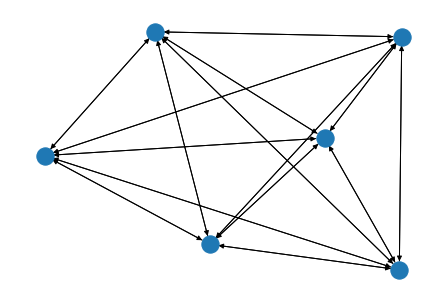

In [29]:
import pulp
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
path= r'C:\Program Files\IBM\ILOG\CPLEX_Studio2211\cplex\bin\x64_win64\cplex.exe'
G=nx.DiGraph()
nodes=stop_stations
edges=get_distances_cluster(0)
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)
nx.draw(G)

In [30]:
P=[]
L=[]
for i in stop_stations:
    for j in stop_stations:
        if i!=j:
            L.append(G[i][j]["weight"])
        else:
            L.append(0)
    P.append(L)
    L=[]

In [31]:
a,b=get_ab_per_cluster(stop_stations,starts,ends)

In [32]:
problem=pulp.LpProblem("Amazon_projet",pulp.LpMinimize)
X=[[pulp.LpVariable(f"X{i}_{j}", cat=pulp.LpBinary) for j in nodes] for i in nodes]
t=[pulp.LpVariable(name=f"t{i}",cat=pulp.LpContinuous,lowBound=a[i],upBound=b[i]) for i in range(len(nodes))]
problem += pulp.lpSum([X[i][j]*P[i][j] for i in range(len(nodes))  for j in range(len(nodes))])


In [34]:
import itertools
#Constraints
for i in range(len(nodes)):
    if i != len(nodes)-1:
        problem += pulp.lpSum([X[i][j] for j in range(0, len(nodes))])==1
    if i!=len(nodes)-1 and i!=0:
        problem += pulp.lpSum([X[i][j] for j in range(0, len(nodes))]) ==pulp.lpSum([X[j][i] for j in range(0, len(nodes))])
    if i==0:
        problem += pulp.lpSum([X[i][j] for j in range(0, len(nodes))])-pulp.lpSum([X[j][i] for j in range(0, len(nodes))])==1
    if i==len(nodes)-1:
        problem += pulp.lpSum([X[i][j] for j in range(0, len(nodes))]) - pulp.lpSum([X[j][i] for j in range(0, len(nodes))]) == -1
    problem+=X[i][i]==0
for j in range(len(nodes)):
    if j!=0:
        problem += pulp.lpSum([X[i][j] for i in range(0, len(nodes))]) == 1
for i in range(len(nodes)):
    for j in range(len(nodes)):
        t[i]+P[i][j]-t[j]<=M*(1-X[i][j])
for k in range(len(nodes)):
    for S in range(2, len(nodes)):
        for subset in itertools.combinations([i for i in range(len(nodes)) if i != k], S):
            problem += pulp.lpSum([X[i][j] for i in subset for j in subset if i != j]) <= len(subset) - 1
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if pulp.value(X[i][j])==1:
            edges_selected.append((nodes[i],nodes[j],P[i][j]))

    

In [35]:
Y = [pulp.LpVariable(name=f"Y{i}", cat=pulp.LpBinary) for i in range(len(nodes))]
while True:
    solver = pulp.CPLEX_CMD(path=path)
    problem.solve(solver)
    edges_selected=[]
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if pulp.value(X[i][j])==1:
                edges_selected.append((nodes[i],nodes[j],P[i][j]))
    sol=nx.Graph()
    sol.add_nodes_from(nodes)
    sol.add_weighted_edges_from(edges_selected)
    nr_connected_components = nx.number_connected_components(sol)
    if nr_connected_components == 1:
        break 
    else:
        components = nx.connected_components(sol)
        for c in tqdm(components, total=nr_connected_components):
            problem += pulp.lpSum(X[i][j]for i in range(len(c)) for j in range(len(c)) if i != j) <= len(c) - 1
            for node in c:
                problem += pulp.lpSum(X[i][j] for i in range(len(nodes)) for j in range(len(nodes)) if nodes[i] == node or nodes[j] == node) <= Y[nodes.index(node)]
            problem += pulp.lpSum(Y) >= 1
    
    

In [36]:
solver = pulp.CPLEX_CMD(path=path)
problem.solve(solver)
print("La valeur de la fonction objective: ",pulp.value(problem.objective))
for i in range(len(nodes)):
    for j in range(len(nodes)):
        print(f"la valeur de X{nodes[i]}_{nodes[j]} est: {pulp.value(X[i][j])}")
edges_selected=[]
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if pulp.value(X[i][j])==1:
            edges_selected.append((nodes[i],nodes[j],P[i][j]))
print(edges_selected)

La valeur de la fonction objective:  1051.6
la valeur de XEU_EU est: 0.0
la valeur de XEU_JH est: 0.0
la valeur de XEU_LC est: 0.0
la valeur de XEU_MW est: 0.0
la valeur de XEU_RQ est: 1.0
la valeur de XEU_ZP est: 0.0
la valeur de XJH_EU est: 0.0
la valeur de XJH_JH est: 0.0
la valeur de XJH_LC est: 0.0
la valeur de XJH_MW est: 1.0
la valeur de XJH_RQ est: 0.0
la valeur de XJH_ZP est: 0.0
la valeur de XLC_EU est: 0.0
la valeur de XLC_JH est: 1.0
la valeur de XLC_LC est: 0.0
la valeur de XLC_MW est: 0.0
la valeur de XLC_RQ est: 0.0
la valeur de XLC_ZP est: 0.0
la valeur de XMW_EU est: 0.0
la valeur de XMW_JH est: 0.0
la valeur de XMW_LC est: 0.0
la valeur de XMW_MW est: 0.0
la valeur de XMW_RQ est: 0.0
la valeur de XMW_ZP est: 1.0
la valeur de XRQ_EU est: 0.0
la valeur de XRQ_JH est: 0.0
la valeur de XRQ_LC est: 1.0
la valeur de XRQ_MW est: 0.0
la valeur de XRQ_RQ est: 0.0
la valeur de XRQ_ZP est: 0.0
la valeur de XZP_EU est: 0.0
la valeur de XZP_JH est: 0.0
la valeur de XZP_LC est: 0.0

In [37]:
len(stop_stations)

6

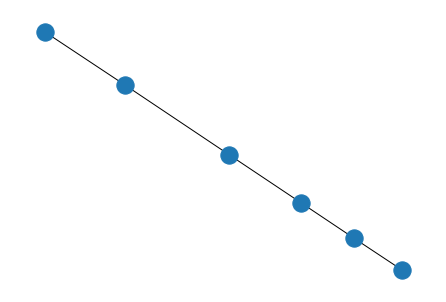

In [38]:
sol=nx.Graph()
sol.add_nodes_from(nodes)
sol.add_weighted_edges_from(edges_selected)
nx.draw(sol)

{('EU', 'RQ'): Text(-0.6492085296183416, 0.6822541814210079, '368.4'),
 ('JH', 'MW'): Text(0.3206543078046724, -0.33226628170896494, '70.3'),
 ('JH', 'LC'): Text(-0.09113712346339757, 0.11144437244203041, '171.4'),
 ('LC', 'RQ'): Text(-0.39789927206856746, 0.4308772913106358, '359.4'),
 ('MW', 'ZP'): Text(0.7403456530817389, -0.7936985538630388, '82.1')}

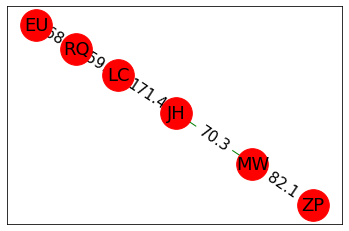

In [39]:
weight = nx.get_edge_attributes(sol, 'weight')
pos= nx.spring_layout(sol)
nx.draw_networkx(sol,pos=pos, with_labels=True,node_size= 1000, node_color='r', edge_color='g', arrowsize=35, font_size=18)
nx.draw_networkx_edge_labels(sol,pos=pos,edge_labels=weight , font_size =15)


In [40]:
is_strongly_connected = nx.is_connected(sol)

is_strongly_connected

True

In [41]:
def sum_distances_point(point,distances):
    somme=0
    for element in distances:
        if element[0]==point:
            somme+=element[2]
    return somme

In [42]:
def get_departure_arrival(stop_stations,distances):
    L=[]
    for stop in stop_stations:
        L.append((stop,sum_distances_point(stop,distances)))
    v_0=min(L, key = lambda t: t[1])[0]
    v_f=max(L, key = lambda t: t[1])[0]
    return v_0,v_f

In [43]:
v_0,v_f=get_departure_arrival(stop_stations,get_distances_cluster(1))

In [44]:
stop_stations[stop_stations.index(v_f)],stop_stations[-1]=stop_stations[-1],stop_stations[stop_stations.index(v_f)]

In [45]:
stop_stations

['ZP', 'JH', 'LC', 'MW', 'RQ', 'EU']

In [46]:
stop_stations[stop_stations.index(v_0)],stop_stations[0]=stop_stations[0],stop_stations[stop_stations.index(v_0)]
stop_stations

['EU', 'JH', 'LC', 'MW', 'RQ', 'ZP']

In [47]:
def get_centroids(num_cluster):
    lat=sum(list(route_stops_data[route_stops_data["Cluster"]==num_cluster]["lat"]))/len(list(route_stops_data[route_stops_data["Cluster"]==num_cluster]["lat"]))
    lng=sum(list(route_stops_data[route_stops_data["Cluster"]==num_cluster]["lng"]))/len(list(route_stops_data[route_stops_data["Cluster"]==num_cluster]["lng"]))
    return {"lat":lat,"lng":lng}

In [48]:
centroids=[get_centroids(num_cluster) for num_cluster in range(n_clusters)]

In [49]:
import math
def get_distance(point,centroid):
    
    value=np.sqrt((centroid["lng"]-point['lng'])**2+(centroid["lat"]-point["lat"])**2)
    return value


In [50]:
index=route_stops_data[route_stops_data["Cluster"]==1].index[0]
route_stops_data[route_stops_data["Cluster"]==1].to_dict(orient="index")[index]

{'lat': 42.347668,
 'lng': -71.193979,
 'type': 'Dropoff',
 'zone_id': 'A-28.1D',
 'Cluster': 1}

In [51]:
route_stops_data.index[i]

'AZ'

In [56]:
def get_farthest_point(num_cluster):
    centroid=get_centroids(num_cluster)
    L=[]
    indicies=route_stops_data_modified[route_stops_data["Cluster"]==num_cluster].index
    points=route_stops_data_modified[route_stops_data["Cluster"]==num_cluster].to_dict(orient="index")

    for i in range(len(points)):
        index=indicies[i]
        L.append((index,get_distance(points[index],centroid)))
    max_value=max(L, key = lambda t: t[1])
    return max_value

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
def farthest_points_clusters(n_clusters):
    points=[]
    for num in range(n_clusters):
        point=get_farthest_point(num)
        points.append(point[0])
    return points

In [58]:
farthest_points=farthest_points_clusters(n_clusters=n_clusters)

NameError: name 'route_stops_data_modified' is not defined

In [85]:
def get_point_restricted_cluster(num_cluster,starts,ends):
    cluster=get_cluster_points(num_cluster=num_cluster)
    stop_stations=list(cluster.index)
    duree=[]
    for stop in stop_stations:
        date_start= datetime.strptime(starts[stop], '%Y-%m-%d %H:%M:%S')
        date_end= datetime.strptime(ends[stop], '%Y-%m-%d %H:%M:%S')
        time=date_end-date_start                          
        duree.append((stop,time))
        min_value=min(duree, key = lambda t: t[1])
    return min_value[0]

In [84]:
get_point_restricted_cluster(12,starts,ends)

('PM', datetime.timedelta(seconds=25200))

In [97]:
departure_point=route_stops_data[route_stops_data["type"]=="Station"].index[0]
departure_point_info=route_stops_data[route_stops_data["type"]=="Station"].to_dict(orient='index')[departure_point]

def get_point_restricted_cluster(num_cluster,starts,ends):
    cluster=get_cluster_points(num_cluster=num_cluster)
    stop_stations=list(cluster.index)
    duree=[]
    for stop in stop_stations:
        date_start= datetime.strptime(starts[stop], '%Y-%m-%d %H:%M:%S')
        date_end= datetime.strptime(ends[stop], '%Y-%m-%d %H:%M:%S')
        time=date_end-date_start                          
        duree.append((stop,time))
        min_value=min(duree, key = lambda t: t[1])
    return min_value[0]

def get_farthest_point_departure(departure_point_info,closest_point_cluster,closest_point):
    L=[]
    indicies=route_stops_data.index
    points=route_stops_data.to_dict(orient="index")

    for i in range(len(points)):
        index=indicies[i]
        value=get_distance(points[index],departure_point_info)
        distance_closest_point=get_distance(points[closest_point[0]],points[index])
        if isNaN(value)!=True and points[index]["Cluster"]!=closest_point_cluster and value!=0:
            L.append((index,value))
    min_value=min(L, key = lambda t: t[1])
    return min_value

def get_closest_point_departure(departure_point_info):
    L=[]
    indicies=route_stops_data.index
    points=route_stops_data.to_dict(orient="index")

    for i in range(len(points)):
        index=indicies[i]
        value=get_distance(points[index],departure_point_info)
        if isNaN(value)!=True and value!=0:
            L.append((index,value))
    min_value=min(L, key = lambda t: t[1])
    return min_value
        

In [123]:
v_0=get_closest_point_departure(departure_point_info)
closest_point_cluster=route_stops_data.loc[v_0[0]]["Cluster"]
v_f=get_farthest_point_departure(departure_point_info,closest_point_cluster,v_0)
farthest_point_cluster=route_stops_data.loc[v_f[0]]["Cluster"]

stop_stations=[get_point_restricted_cluster(i,starts,ends) for i in range(n_clusters) if i!=closest_point_cluster and i!=farthest_point_cluster]
stop_stations.insert(0,v_0[0])
stop_stations.insert(-1,v_f[0])

In [136]:
stop_stations=stop_stations[:10]

['AL', 'EU', 'FG', 'KI', 'BR', 'FE', 'EF', 'BS', 'AV', 'AZ']

In [131]:
edges=[]
for i in range(len(stop_stations)):
    for j in range(len(stop_stations)):
        if i!=j:
            index_row=stop_stations[i]
            index_column=stop_stations[j]
            value=route_distances.loc[index_row][index_column]
            edges.append((index_row,index_column,value))

In [132]:
edges

[('AL', 'EU', 322.6),
 ('AL', 'FG', 458.4),
 ('AL', 'KI', 591.0),
 ('AL', 'BR', 240.4),
 ('AL', 'FE', 441.2),
 ('AL', 'EF', 483.1),
 ('AL', 'BS', 152.2),
 ('AL', 'AV', 260.9),
 ('AL', 'AZ', 624.7),
 ('EU', 'AL', 301.9),
 ('EU', 'FG', 302.6),
 ('EU', 'KI', 372.0),
 ('EU', 'BR', 143.9),
 ('EU', 'FE', 194.4),
 ('EU', 'EF', 240.5),
 ('EU', 'BS', 249.6),
 ('EU', 'AV', 100.8),
 ('EU', 'AZ', 400.1),
 ('FG', 'AL', 425.2),
 ('FG', 'EU', 266.9),
 ('FG', 'KI', 365.5),
 ('FG', 'BR', 226.0),
 ('FG', 'FE', 184.5),
 ('FG', 'EF', 209.9),
 ('FG', 'BS', 372.9),
 ('FG', 'AV', 173.2),
 ('FG', 'AZ', 379.8),
 ('KI', 'AL', 621.0),
 ('KI', 'EU', 400.1),
 ('KI', 'FG', 345.6),
 ('KI', 'BR', 465.4),
 ('KI', 'FE', 272.8),
 ('KI', 'EF', 358.1),
 ('KI', 'BS', 568.7),
 ('KI', 'AV', 400.0),
 ('KI', 'AZ', 122.7),
 ('BR', 'AL', 228.2),
 ('BR', 'EU', 132.4),
 ('BR', 'FG', 250.5),
 ('BR', 'KI', 400.8),
 ('BR', 'FE', 251.0),
 ('BR', 'EF', 297.1),
 ('BR', 'BS', 175.9),
 ('BR', 'AV', 70.7),
 ('BR', 'AZ', 438.7),
 ('FE', 'AL

In [133]:
a=[]
b=[]
for i in range(n_clusters):
        cluster_points=list(get_cluster_points(i).index)
        starts_cluster,ends_cluster=get_ab_per_cluster(cluster_points,starts,ends)
        if i!=closest_point_cluster and i!=farthest_point_cluster:
            a.append(max(starts_cluster))
            b.append(min(ends_cluster))
        if i==closest_point_cluster:
            a.insert(0,max(starts_cluster))
            b.insert(0,min(ends_cluster))
        if i==farthest_point_cluster:
            a.insert(-1,max(starts_cluster))
            b.insert(-1,min(ends_cluster))
            
    






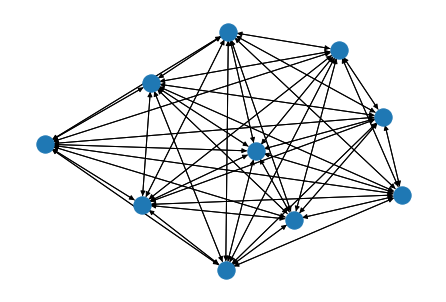

In [134]:
from itertools import chain
import itertools
path= r'C:\Program Files\IBM\ILOG\CPLEX_Studio2211\cplex\bin\x64_win64\cplex.exe'
G=nx.DiGraph()
nodes=stop_stations
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)
nx.draw(G)
P=[]
L=[]
for i in stop_stations:
    for j in stop_stations:
        if i!=j:
            L.append(G[i][j]["weight"])
        else:
            L.append(0)
    P.append(L)
    L=[]
problem=pulp.LpProblem("Amazon_projet",pulp.LpMinimize)
X=[[pulp.LpVariable(f"X{i}_{j}", cat=pulp.LpBinary) for j in nodes] for i in nodes]
t=[pulp.LpVariable(name=f"t{i}",cat=pulp.LpContinuous,lowBound=a[i],upBound=b[i]) for i in range(len(nodes))]
Y = [pulp.LpVariable(name=f"Y{i}", cat=pulp.LpBinary) for i in range(len(nodes))]
M=(max(b)+max(list(chain.from_iterable(P))))*10
problem += pulp.lpSum([X[i][j]*P[i][j] for i in range(len(nodes))  for j in range(len(nodes))])
for i in range(len(nodes)):
    if i != len(nodes)-1:
        problem += pulp.lpSum([X[i][j] for j in range(0, len(nodes))])==1
    if i!=len(nodes)-1 and i!=0:
        problem += pulp.lpSum([X[i][j] for j in range(0, len(nodes))]) ==pulp.lpSum([X[j][i] for j in range(0, len(nodes))])
    if i==0:
        problem += pulp.lpSum([X[i][j] for j in range(0, len(nodes))])-pulp.lpSum([X[j][i] for j in range(0, len(nodes))])==1
    if i==len(nodes)-1:
        problem += pulp.lpSum([X[i][j] for j in range(0, len(nodes))]) - pulp.lpSum([X[j][i] for j in range(0, len(nodes))]) == -1
    problem+=X[i][i]==0
for j in range(len(nodes)):
    if j!=0:
        problem += pulp.lpSum([X[i][j] for i in range(0, len(nodes))]) == 1
for i in range(len(nodes)):
    for j in range(len(nodes)):
        t[i]+P[i][j]-t[j]<=M*(1-X[i][j])
for k in range(len(nodes)):
    for S in range(2, len(nodes)):
        for subset in itertools.combinations([i for i in range(len(nodes)) if i != k], S):
            problem += pulp.lpSum([X[i][j] for i in subset for j in subset if i != j]) <= len(subset) - 1

for i in range(len(nodes)):
    for j in range(len(nodes)):
        if pulp.value(X[i][j])==1:
            edges_selected.append((nodes[i],nodes[j],P[i][j]))


In [135]:
solver = pulp.CPLEX_CMD(path=path)
problem.solve(solver)
print("La valeur de la fonction objective: ",pulp.value(problem.objective))
for i in range(len(nodes)):
    for j in range(len(nodes)):
        print(f"la valeur de X{nodes[i]}_{nodes[j]} est: {pulp.value(X[i][j])}")
edges_selected=[]
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if pulp.value(X[i][j])==1:
            edges_selected.append((nodes[i],nodes[j],P[i][j]))
print(edges_selected)

La valeur de la fonction objective:  1480.8
la valeur de XAL_AL est: 0.0
la valeur de XAL_EU est: 0.0
la valeur de XAL_FG est: 0.0
la valeur de XAL_KI est: 0.0
la valeur de XAL_BR est: 0.0
la valeur de XAL_FE est: 0.0
la valeur de XAL_EF est: 0.0
la valeur de XAL_BS est: 1.0
la valeur de XAL_AV est: 0.0
la valeur de XAL_AZ est: 0.0
la valeur de XEU_AL est: 0.0
la valeur de XEU_EU est: 0.0
la valeur de XEU_FG est: 0.0
la valeur de XEU_KI est: 0.0
la valeur de XEU_BR est: 0.0
la valeur de XEU_FE est: 0.0
la valeur de XEU_EF est: 0.0
la valeur de XEU_BS est: 0.0
la valeur de XEU_AV est: 1.0
la valeur de XEU_AZ est: 0.0
la valeur de XFG_AL est: 0.0
la valeur de XFG_EU est: 0.0
la valeur de XFG_FG est: 0.0
la valeur de XFG_KI est: 0.0
la valeur de XFG_BR est: 0.0
la valeur de XFG_FE est: 0.0
la valeur de XFG_EF est: 1.0
la valeur de XFG_BS est: 0.0
la valeur de XFG_AV est: 0.0
la valeur de XFG_AZ est: 0.0
la valeur de XKI_AL est: 0.0
la valeur de XKI_EU est: 0.0
la valeur de XKI_FG est: 0.0

In [ ]:
Y = [pulp.LpVariable(name=f"Y{i}", cat=pulp.LpBinary) for i in range(len(nodes))]
while True:
    solver = pulp.CPLEX_CMD(path=path)
    problem.solve(solver)
    edges_selected=[]
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if pulp.value(X[i][j])==1:
                edges_selected.append((nodes[i],nodes[j],P[i][j]))
    sol=nx.Graph()
    sol.add_nodes_from(nodes)
    sol.add_weighted_edges_from(edges_selected)
    nr_connected_components = nx.number_connected_components(sol)
    if nr_connected_components == 1:
        break 
    else:
        components = nx.connected_components(sol)
        for c in tqdm(components, total=nr_connected_components):
            problem += pulp.lpSum(X[i][j]for i in range(len(c)) for j in range(len(c)) if i != j) <= len(c) - 1
            for node in c:
                problem += pulp.lpSum(X[i][j] for i in range(len(nodes)) for j in range(len(nodes)) if nodes[i] == node or nodes[j] == node) <= Y[nodes.index(node)]
            problem += pulp.lpSum(Y) >= 1

In [ ]:
b=[31,31,31,31,31,31,31,31,31,31,31,31,31]